In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
DIR='../input/brain-tumor-classification-mri/Training'
CAT=[]
for cat in os.listdir(DIR):
    CAT.append(cat)

In [3]:
CAT

['glioma_tumor', 'pituitary_tumor', 'meningioma_tumor', 'no_tumor']

In [7]:
training_data=[]
training_label=[]
for cat in os.listdir(DIR):
    PATH=os.path.join(DIR,cat)
    for img in os.listdir(PATH):
        img_arr=cv2.imread(os.path.join(PATH,img),cv2.IMREAD_GRAYSCALE)
        new_arr=cv2.resize(img_arr,(100,100))
        #plt.imshow(img_arr,cmap='gray')
        training_data.append(new_arr)
        training_label.append(cat)
        #plt.show()

In [11]:
X=[]
Y=[]
for img in training_data:
    X.append(img)

In [19]:
Y=training_label

In [21]:
Y[-1]

'no_tumor'

In [22]:
import pandas as pd
Y=pd.DataFrame(Y)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_lb=le.fit_transform(Y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
Y_lb

array([0, 0, 0, ..., 2, 2, 2])

In [26]:
set(Y_lb)

{0, 1, 2, 3}

In [39]:
Y_lb[826]

3

glioma_tumor=0
meningioma_tumor=1
No_tumor=2
pituitary_tumor=3

In [40]:
X=np.array(X).reshape(-1,100,100,1)

In [47]:
X=X/255

In [41]:
Y_lb=np.array(Y_lb)

In [43]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_lb,random_state=1)

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,MaxPooling2D
from keras.layers import Flatten,Activation
from keras.layers import Dense

In [54]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(100, 100, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='RMSProp',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,Y_train,batch_size=10,epochs=10)

Epoch 1/10
216/216 [==============================] - 51s 238ms/step - loss: 1.0780 - accuracy: 0.5149
Epoch 2/10
216/216 [==============================] - 51s 235ms/step - loss: 0.7336 - accuracy: 0.6924
Epoch 3/10
216/216 [==============================] - 51s 236ms/step - loss: 0.5815 - accuracy: 0.7658
Epoch 4/10
216/216 [==============================] - 50s 232ms/step - loss: 0.4591 - accuracy: 0.8276
Epoch 5/10
216/216 [==============================] - 49s 229ms/step - loss: 0.3803 - accuracy: 0.8564
Epoch 6/10
216/216 [==============================] - 50s 231ms/step - loss: 0.2942 - accuracy: 0.8894
Epoch 7/10
216/216 [==============================] - 50s 231ms/step - loss: 0.2297 - accuracy: 0.9131
Epoch 8/10
216/216 [==============================] - 50s 232ms/step - loss: 0.2047 - accuracy: 0.9205
Epoch 9/10
216/216 [==============================] - 50s 231ms/step - loss: 0.1663 - accuracy: 0.9387
Epoch 10/10
216/216 [==============================] - 50s 232ms/step - l

In [56]:
history.history

{'loss': [1.0779695510864258,
  0.733637273311615,
  0.5815415382385254,
  0.45914748311042786,
  0.3803340792655945,
  0.29419973492622375,
  0.22965095937252045,
  0.20466174185276031,
  0.16627611219882965,
  0.12675973773002625],
 'accuracy': [0.5148698687553406,
  0.6923791766166687,
  0.7657992839813232,
  0.827602207660675,
  0.8564126491546631,
  0.8894051909446716,
  0.9131041169166565,
  0.9205390214920044,
  0.9386616945266724,
  0.9591078162193298]}

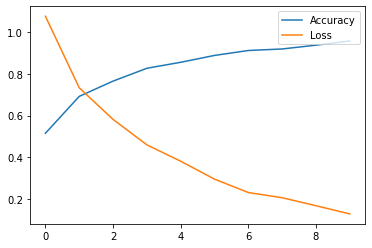

In [61]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.legend(loc="upper right")
plt.show()

In [106]:
y_pred=model.predict(X_test)
Y_pred=pd.DataFrame(y_pred)
Y_pred['pred']=Y_pred.idxmax(axis=1)
Y_pred['test']=Y_test
Y_pred['diff']=Y_pred['pred']-Y_pred['test']
Y_pred['diff'].value_counts()

 0    615
-1     56
 1     22
 2     11
-2      7
 3      4
-3      3
Name: diff, dtype: int64

In [108]:
acc=(615/(615+56+22+11+7+7))
acc

0.8565459610027855

In [110]:
Pr={0:'glioma_tumor',1:'meningioma_tumor',2:'no_tumor',3:'pituitary_tumor'}

In [111]:
Y_pred['pred']=Y_pred['pred'].map(Pr)

In [137]:

def enter_new_data(DIR):
    img_arr=cv2.imread(DIR,cv2.IMREAD_GRAYSCALE)
    new_arr=cv2.resize(img_arr,(100,100))
    new_arr=np.array(new_arr).reshape(-1,100,100,1)
    y_pred=model.predict(new_arr)
    Y_pred=pd.DataFrame(y_pred)
    Y_pred['pred']=Y_pred.idxmax(axis=1)
    Y_pred['pred']=Y_pred['pred'].map(Pr)
    pre= Y_pred['pred']
    return pre

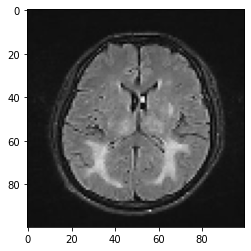

In [138]:
DIR='../input/brain-tumor-classification-mri/Testing/no_tumor/image(10).jpg'
img_arr=cv2.imread(DIR,cv2.IMREAD_GRAYSCALE)
new_arr=cv2.resize(img_arr,(100,100))
plt.imshow(new_arr,cmap='gray')

In [139]:
enter_new_data(DIR)

0    no_tumor
Name: pred, dtype: object

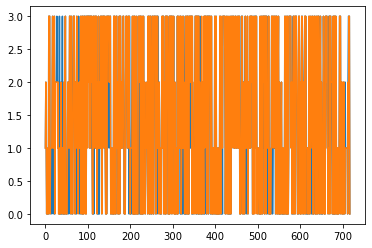

In [77]:
plt.plot(pred)
plt.plot(Y_test)
plt.show()